# Part One

## 1.Create a dataframe or tibble representing this dataset that has the desired properties.

In [1]:
import pandas as pd
import numpy as np
import random
ID = []
Group = []
Feature_1 = np.zeros(800)
Feature_2 = np.zeros(800)
Feature_3 = np.zeros(800)

In [2]:
for i in range(800):
    ID.append(f"ID{i:03d}")

In [3]:
elements = ['A', 'B', 'C']
for i in range(800):
    Group.append(random.choice(elements))
Group = pd.Series(Group)

In [4]:
np.random.seed(42)
from scipy.stats import norm
probability = 0.83
mean = 0
std_dev = 1
quantile = norm.ppf(probability, loc=mean, scale=std_dev)
std = 300 / quantile
Feature_1 = norm.rvs(loc=2500, scale=std, size=800)

In [5]:
len(Feature_1[(Feature_1>=2200) & (Feature_1<=2800)])

541

In [6]:
norm.ppf(probability, loc=mean, scale=std_dev)

0.9541652531461943

In [7]:
Feature_2 = norm.rvs(loc=400, scale=15, size=800)

In [8]:
fake_data= pd.DataFrame({'ID': ID, 'Group': Group, 'Feature_1': Feature_1, 'Feature_2': Feature_2, 'Feature_3': Feature_3})

In [9]:
for i in range(800):
    if fake_data['Group'][i] == 'A':
        fake_data['Feature_3'][i] = 3 * fake_data['Feature_1'][i]-5 * fake_data['Feature_2'][i]
    if fake_data['Group'][i] == 'B':
        fake_data['Feature_3'][i] = 2 * fake_data['Feature_1'][i]
    if fake_data['Group'][i] == 'C':
        fake_data['Feature_3'][i] = -fake_data['Feature_1'][i] + fake_data['Feature_2'][i]

/var/folders/b2/227vk7ns3v17qppyllj3sbbc0000gn/T/ipykernel_9532/1334885391.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fake_data['Feature_3'][i] = 2 * fake_data['Feature_1'][i]
/var/folders/b2/227vk7ns3v17qppyllj3sbbc0000gn/T/ipykernel_9532/1334885391.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fake_data['Feature_3'][i] = 3 * fake_data['Feature_1'][i]-5 * fake_data['Feature_2'][i]
/var/folders/b2/227vk7ns3v17qppyllj3sbbc0000gn/T/ipykernel_9532/1334885391.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.

In [10]:
random_column = np.random.normal(loc=0, scale=12, size=800)
fake_data['Feature_3'] = fake_data['Feature_3'] + random_column

## 2. Answer the following questions:

### a. Based on the theoretical distribution of Feature_1, how many samples do you expect to find where the value of the feature is greater than 3000?

In [12]:
(1-norm.cdf(3000, loc=2500, scale=std)) * 800

44.70909448623112

### b. How many samples did you actually find where Feature_1 is greater than 3000?

In [13]:
len(Feature_1[Feature_1>3000])

45

### c. Group the dataset by the Group field and compute the mean and standard deviation of Feature_3 within each group.

In [14]:
Group_A = fake_data[fake_data['Group'] == 'A']
Group_B = fake_data[fake_data['Group'] == 'B']
Group_C = fake_data[fake_data['Group'] == 'C']
mean_A = Group_A['Feature_3'].mean()
std_A = Group_A['Feature_3'].std()
mean_B = Group_B['Feature_3'].mean()
std_B = Group_B['Feature_3'].std()
mean_C = Group_C['Feature_3'].mean()
std_C = Group_C['Feature_3'].std()
print(f"The mean of Group A is {mean_A}, and the standard deviation of Group A is {std_A}")
print(f"The mean of Group B is {mean_B}, and the standard deviation of Group B is {std_B}")
print(f"The mean of Group C is {mean_C}, and the standard deviation of Group C is {std_C}")

The mean of Group A is 5496.0181750080765, and the standard deviation of Group A is 935.1880882453734
The mean of Group B is 4980.57528662655, and the standard deviation of Group B is 650.6599964191759
The mean of Group C is -2099.229289698951, and the standard deviation of Group C is 290.6861745582287


## 3. Make a scatterplot of Feature_3 vs Feature_1.

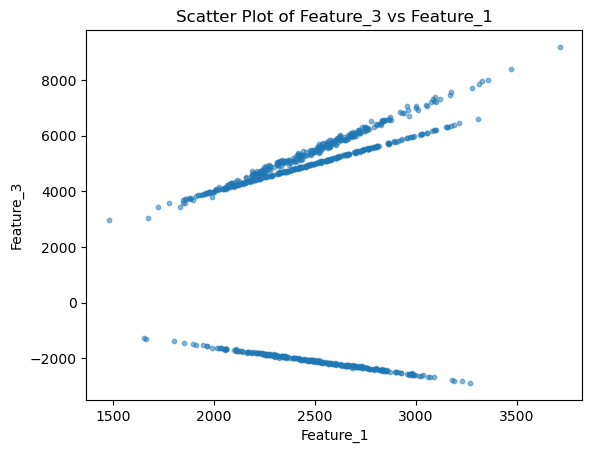

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
plt.scatter(fake_data['Feature_1'], fake_data['Feature_3'], s=10, alpha=0.5)
plt.xlabel('Feature_1')
plt.ylabel('Feature_3')
plt.title('Scatter Plot of Feature_3 vs Feature_1')
plt.show()

## 4. Write your constructed dataframe/tibble to a csv file called fake_data.csv.

In [16]:
fake_data.to_csv('fake_data.csv',index=False)